               0
count  37.000000
mean   27.773789
std     0.768900
min    26.048300
25%    27.326700
50%    27.697700
75%    28.435600
max    29.287800


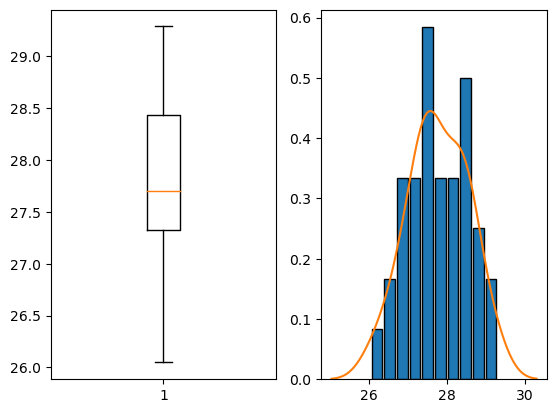

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap


file1= '/home/ben/ictp/numforGeosciences-ICTP/datasets/lec1-sample.txt'
data = np.loadtxt(file1)

plt.subplot(1,2,1) # boxplot
plt.boxplot(data) 
plt.subplot(1,2,2) # histogram
plt.hist(data, bins=10, rwidth=0.85, edgecolor = "k", density = 1.0)

# kernel density estimation
kde_obj = stats.gaussian_kde(data)
x_pts = np.linspace(min(data)-1, max(data)+1, 100)
estimated_pdf = kde_obj.evaluate(x_pts)
plt.plot(x_pts, estimated_pdf)

df = pd.DataFrame(data)
print(df.describe())

467.38626


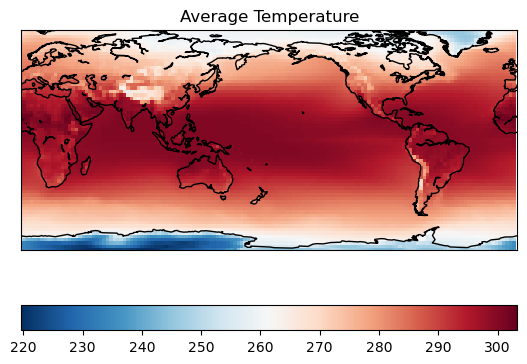

In [194]:
file2 = "/home/ben/ictp/numforGeosciences-ICTP/datasets/lec1-era5_tas_1959_2021_25deg.nc"
f1 = nc.Dataset(file2)
lon = f1.variables['lon'][:]
lat = f1.variables['lat'][:]
var = f1.variables['t2m'][:,:,:]
varAverage = np.average(var, axis = 0)

# temp_list = np.reshape(varAverage, (1,len(lon)*len(lat)))
# print(np.var(temp_list))
# print(np.mean(temp_list))
# print(np.median(temp_list))

lon, lat = np.meshgrid(lon, lat)
m = Basemap(llcrnrlat=-80,urcrnrlat=80,llcrnrlon=0,urcrnrlon=360)
m.drawcoastlines()
m.pcolormesh(lon, lat, varAverage,latlon=True, cmap='RdBu_r')
plt.title("Average Temperature")
plt.colorbar(location = "bottom")
